In [1]:
import numpy as np
# import numpy.random as nr
# import numpy.linalg as nlin
# import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from timeit import default_timer as timer
from genGM import *
from herding_paper import *
from Plot_Gaussian import *
# import seaborn as sns

In [2]:
def plotContour(gm,samples=None):
    stdsig = 2

    xx, yy = np.mgrid[np.min(
        gm.means[:, 0])-stdsig:np.max(gm.means[:, 0])+stdsig:.1, np.min(gm.means[:, 1])-stdsig:np.max(gm.means[:, 1])+stdsig:.1]
    # xx, yy = np.mgrid[-4:6:.1, -4:6:.1]
    pos = np.empty(xx.shape + (2,))
    pos[:,:,0] = xx; pos[:,:,1] = yy

    f = gm.pdf(pos)
    plt.figure()
    plt.contour(xx, yy, f, 20)
    # plt.scatter(*mus.T, facecolors='none', edgecolors='r')
    if samples is not None:
        plt.scatter(*samples.T,c='red',marker='x')
    plt.show()

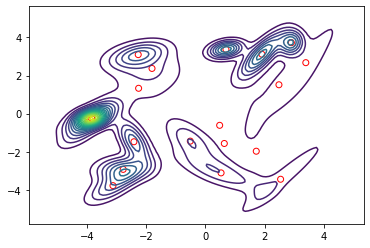

In [3]:
kernel = GKernel(np.zeros(0), np.array([[1,0],[0,1]]))
gm = generate_GM(20, 2, Plot=True)

In [4]:
# gaussian mixture area
area = np.array([np.min(gm.means, axis=0), np.max(gm.means, axis=0)])

In [5]:
start_time = timer()
samples, losses = herding_sequential_sample(gm, kernel, 20, area, 10000)
print("Time of herding: %.3f" % (timer()-start_time))

Time of herding: 115.852


In [6]:
samples

array([[-3.59662083, -0.38413179],
       [ 2.09487428,  3.21486744],
       [-2.17588418,  2.68465984],
       [-1.88202397, -2.31326294],
       [ 0.85007016, -2.87368887],
       [ 1.91793754,  0.88584431],
       [ 0.17697113,  3.2016029 ],
       [-3.14702302,  0.5315155 ],
       [ 3.36630138,  3.72033048],
       [-3.93543017, -1.47182304],
       [-0.52446873, -0.83706406],
       [-2.40970111, -3.52595262],
       [ 2.5098646 , -3.75586862],
       [-2.82166347,  3.59185096],
       [-3.93227472, -0.01296428],
       [ 1.74297443,  2.81392247],
       [-1.36954666,  1.39711418],
       [-2.45287566, -1.56550214],
       [ 3.38739545,  1.85895431],
       [-0.30001869, -2.62334375]])

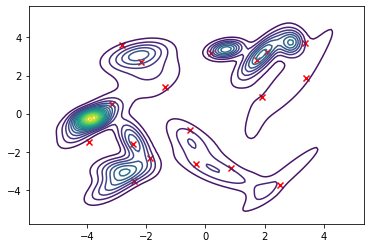

In [7]:
plotContour(gm, samples)

In [8]:
losses

[0.058818310600886936,
 0.031010654190981937,
 0.01943012191832877,
 0.012278863116417507,
 0.009178496063772685,
 0.007697782342574096,
 0.0065904146903979,
 0.005521519644506622,
 0.004590680270533352,
 0.0037855218427866894,
 0.0030292902272488157,
 0.002524639090266798,
 0.00229261846003076,
 0.0021942707134275825,
 0.0020165138368327057,
 0.0017712037189202554,
 0.001540826646484961,
 0.0013198318883151138,
 0.001200703532963914,
 0.0011190196525762918]

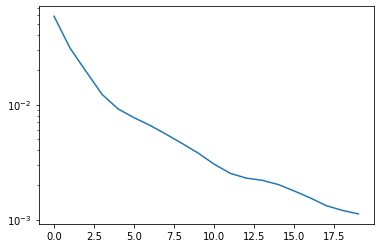

In [10]:
plt.yscale('log')
plt.plot(losses)

In [2]:
sigma = 0.5
mus = [[1.7644,1.0278],[2.2174,-2.722],[1.0073,-0.9821],[2.1473,0.2475],[-1.9556,-3.5406],[-1.0021,3.2158],[0.9342,-0.5304],[-3.7110,-2.5693],[3.8438,-3.1127],[2.8168,-3.2514],[-3.0731,2.7305],[0.228,-2.8512],[-1.9643,-1.0489],[-1.3097,-2.8430],[-3.3647,0.795],[1.3437,-1.0198],[2.1017,-0.5647],[-1.7266,-1.7964],[-0.8518,1.4021],[2.9369,-3.3802]]
sigmas = [
    [[0.1727,0.0043],[0.0043,0.1063]],
    [[0.2909,-0.0007],[-0.0007,0.2671]],
    [[3.0541,2.3127],[2.3127,1.8809]],
    [[0.2046,0.1296],[0.1296,0.1936]],
    [[0.2325,0.3529],[0.3529,1.3044]],
    [[0.1734,-0.0208],[-0.0208,0.0712]],
    [[0.6385,0.1571],[0.1571,0.1055]],
    [[0.8177,0.5617],[0.5617,0.6469]],
    [[1.0715,0.6782],[0.6782,0.5498]],
    [[0.4471,-0.1659],[-0.1659,0.5147]],
    [[0.2294,-0.0006],[-0.0006,0.0672]],
    [[0.0842,-0.006],[-0.006,0.0672]],
    [[0.4279,0.025],[0.025,0.2014]],
    [[0.2681,0.0328],[0.0328,0.3009]],
    [[0.2463,-0.0739],[-0.0739,0.1261]],
    [[0.8137,0.4627],[0.4627,0.4359]],
    [[2.1496,1.2296],[1.2296,1.9657]],
    [[0.5496,-0.1593],[-0.1593,0.1295]],
    [[0.2417,0.1835],[0.1835,0.6737]],
    [[0.5981,0.3097],[0.3097,0.4669]]
]
p = [0.0508,0.0537,0.0343,0.0393,0.0452,0.0518,0.0285,0.0676,0.0354,0.053,0.0575,0.0527,0.0461,0.0614,0.0424,0.0532,0.0605,0.0457,0.0593,0.0614]

mus = np.array(mus)
sigmas = np.array(sigmas)

In [3]:
gm = GaussianMixture(p, mus, sigmas)
kernel = GKernel(np.zeros(0), np.array([[1,0],[0,1]]))

In [4]:
# gaussian mixture area
area = np.array([np.min(gm.means, axis=0), np.max(gm.means, axis=0)])
start_time = timer()
samples, losses = herding_sequential_sample(gm, kernel, 20, area, 10000)
print("Time of herding: %.3f" % (timer()-start_time))

Time of herding: 81.016


In [5]:
losses

[0.06518327955360846,
 0.03404015513373066,
 0.01889543156301839,
 0.013262319337293039,
 0.009511292181764702,
 0.007289676682484304,
 0.005882217531976345,
 0.004968296023842254,
 0.0040655376480528875,
 0.0032652417659523782,
 0.002676533170980523,
 0.0022069225962512073,
 0.001961396094374187,
 0.001631580444763392,
 0.001611515777747984,
 0.001525111915469516,
 0.001377851515154343,
 0.0012142578764432073,
 0.0010404037399214573,
 0.000928202292331564]

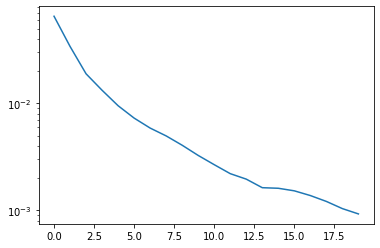

In [6]:
plt.yscale('log')
plt.plot(losses)